# Portfolio Exploration for Visualizations

## Markov Chains

Let's visualize a markov chain.

In [27]:
import matplotlib.pyplot as plt
import os
import numpy as np

### Helper Methods

In [28]:
def markov_chain(T, x_0, n):
    """
    Given a transition operator T and initial state x_0,
    compute state x_n.

    @param T the transition operator
    @param x_0 the initial state
    @param n the maximum state compute

    @return all states x_0, ..., x_n
    """
    states = [x_0]
    x_curr = x_0
    for _ in range(n):
        x_next = T(x_curr)
        x_curr = x_next
        states.append(x_curr)
    return states

In [29]:
def plot_markov_chain(T, x_0, n, labels, filename = ""):
    """
    Plots a the changes in state of a Markov chain at steps
    t = 0, ..., n.

    @param T the transition operator
    @param x_0 the initial state vector
    @param n the maximum state
    """

    x = [i for i in range(n + 1)]
    result = markov_chain(T, x_0, n)
    y = [[] for i in range(len(x_0))]
    for state in result:
        for i in range(len(x_0)):
            y[i].append(state[i])

    for dimension, data in enumerate(y):
        plt.plot(x, data, labels[dimension][0], label=labels[dimension][1])

    plt.legend(loc="best")
    plt.xlabel("Time")
    plt.ylabel("Proportion")

    if filename:
        plt.savefig(f"images/{filename}.png")
    plt.show()

Set parameters

In [30]:
T = lambda x_t : (0.95*x_t[0] + 0.1*x_t[1], 0.05*x_t[0] + 0.9*x_t[1])
x_0 = (0.73, 0.27)
labels = [(".r-", "proportion in city"), (".b-", "proportion in suburbs")]

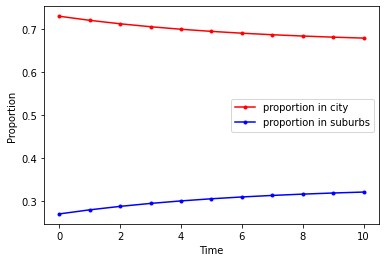

In [31]:
plot_markov_chain(T, x_0, 10, labels, "population_example_n10")

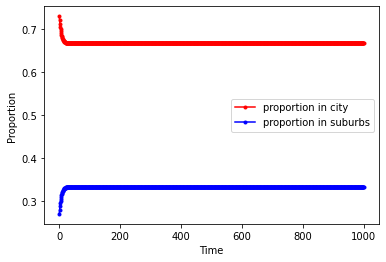

In [32]:
plot_markov_chain(T, x_0, 1000, labels, "population_example_n1000")

In [33]:
T = lambda x_t : (x_t[0] + 0.5*x_t[2], x_t[1], 0.5*x_t[2])
x_0 = (0.7, 0.2, 0.1)
y_0 = (0.1, 0.7, 0.2)
labels = [(".r-", "entry 1"), (".b-", "entry 2"), (".g-", "entry 3")]

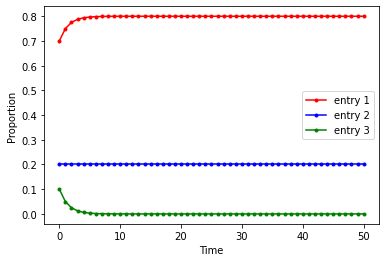

In [34]:
plot_markov_chain(T, x_0, 50, labels, "counterexample_x0_n50")

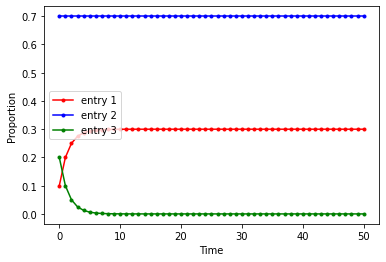

In [35]:
plot_markov_chain(T, y_0, 50, labels, "counterexample_y0_n50")